In [19]:
import pandas as pd
from simulate_costs import *
import random
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.stats.weightstats as sms

In [20]:
saturday_demands = pd.read_csv("output/sat_bootstrap.csv").set_index("Supermarket")
saturday_demands.head()

,Run1,Run2,Run3,Run4,Run5,Run6,Run7,Run8,Run9,Run10,...,Run991,Run992,Run993,Run994,Run995,Run996,Run997,Run998,Run999,Run1000
Supermarket,,,,,,,,,,,,,,,,,,,,,
Four Square Alberton,0,0,1,1,1,1,1,1,1,1,...,0,1,1,1,1,0,0,1,0,1
Four Square Botany Junction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Four Square Cockle Bay,1,1,1,1,1,1,0,1,1,1,...,1,1,1,0,1,1,0,0,0,0
Four Square Ellerslie,1,1,1,1,1,0,1,0,0,1,...,1,0,1,1,1,1,0,1,0,1
Four Square Everglade,0,0,0,0,1,0,1,1,1,1,...,0,1,1,1,1,0,1,1,0,1


In [21]:
weekday_demands = pd.read_csv("output/weekday_bootstrap.csv").set_index("Supermarket")
weekday_demands.head()

,Run1,Run2,Run3,Run4,Run5,Run6,Run7,Run8,Run9,Run10,...,Run991,Run992,Run993,Run994,Run995,Run996,Run997,Run998,Run999,Run1000
Supermarket,,,,,,,,,,,,,,,,,,,,,
Four Square Alberton,3,1,3,2,3,2,3,2,3,3,...,3,3,1,2,2,3,3,3,2,3
Four Square Botany Junction,1,1,3,3,1,3,1,3,3,2,...,1,2,1,3,1,3,1,1,3,2
Four Square Cockle Bay,3,1,1,3,1,3,1,1,2,2,...,3,3,3,1,1,1,2,1,1,3
Four Square Ellerslie,3,3,3,1,2,1,2,1,2,2,...,2,3,3,1,1,3,1,2,1,2
Four Square Everglade,1,1,1,2,1,1,1,2,2,3,...,1,1,1,1,1,1,3,2,1,3


In [22]:
durations = pd.read_csv("../route-generation/output/TravelCosts.csv").set_index(["From", "To"])
durations.head()

Distance   Duration
From             To                                       
New World Albany New World Albany       0.00000   0.000000
                 New World Birkenhead  15.70707  23.833833
                 New World Botany      35.83163  49.946667
                 New World Browns Bay   5.00226  10.337833
                 New World Devonport   17.81659  29.654833

In [23]:
selected_saturday = pd.read_csv("../linear-program/output/selectedRoutesSaturday.csv")\
    .drop(columns="Demand")
selected_saturday.head()

,Route,TruckType,RouteCost
0,"['Warehouse', 'New World Papakura', ""Pak 'n Sa...",OwnedTruck,294.5460
1,"['Warehouse', 'New World Mt Roskill', 'New Wor...",OwnedTruck,192.6705
2,"['Warehouse', ""Pak 'n Save Wairau Road"", 'New ...",OwnedTruck,332.3620
3,"['Warehouse', 'New World Birkenhead', 'Four Sq...",OwnedTruck,432.4040
4,"['Warehouse', 'Four Square Alberton', 'New Wor...",OwnedTruck,260.3805


In [24]:
selected_weekday = pd.read_csv("../linear-program/output/selectedRoutesWeekday.csv")\
    .drop(columns="Demand")
selected_weekday.head()

,Route,TruckType,RouteCost
0,"['Warehouse', 'Four Square Glen Eden', ""Pak 'n...",OwnedTruck,317.127667
1,"['Warehouse', ""Pak 'n Save Lincoln Road"", 'War...",OwnedTruck,104.192500
2,"['Warehouse', ""Pak 'n Save Westgate"", 'Warehou...",OwnedTruck,118.685417
3,"['Warehouse', 'Four Square Everglade', 'New Wo...",OwnedTruck,271.918833
4,"['Warehouse', 'Four Square Alberton', 'Four Sq...",OwnedTruck,387.919750


In [25]:
def plot_pdf(ax, data, integer=False, title=None, xlabel=None):
    bin_range = lambda data: range(min(data), max(data) + 2)

    ax.hist(
        data,
        density=True,
        bins=bin_range(data) if integer else 50,
        rwidth=0.5 if integer else 1,
        align="left" if integer else "mid",
        alpha=0.2
    )
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel("Probability density")


In [26]:
def print_output_stats(sim_output):
    for col in sim_output.columns:
        print(f"{col}: {np.mean(sim_output[col])}, {sms.DescrStatsW(sim_output[col]).tconfint_mean(alpha = 0.05)}")

In [27]:
simulated_saturday = simulate_runs(
    selected_saturday, saturday_demands, durations, "Saturday"
)
simulated_saturday.head()

,Cost,Mainfreight,NumRoutes,ExtraStores
Run,,,,
Run1,2890.0035,0,10,0
Run2,2890.0035,0,10,0
Run3,2890.0035,0,10,0
Run4,2890.0035,0,10,0
Run5,2890.0035,0,10,0


In [28]:
print("Simulation of Saturday Demands")
print("------------------------------")
print_output_stats(simulated_saturday)

Simulation of Saturday Demands
------------------------------
Cost: 2909.6721804999997, (2906.0513307972446, 2913.2930302027557)
Mainfreight: 0.0, (0.0, 0.0)
NumRoutes: 10.159, (10.134343362900847, 10.183656637099155)
ExtraStores: 0.159, (0.13434336290084603, 0.18365663709915397)


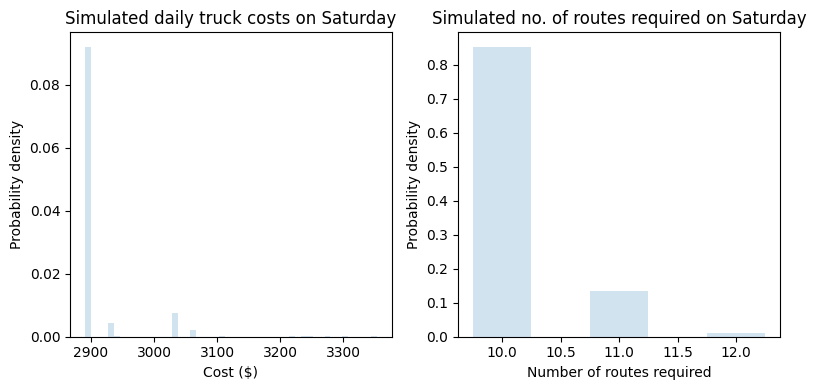

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,4))

plot_pdf(
    ax1,
    simulated_saturday.Cost,
    title="Simulated daily truck costs on Saturday",
    xlabel="Cost ($)"
)

plot_pdf(
    ax2,
    simulated_saturday.NumRoutes,
    integer=True,
    title="Simulated no. of routes required on Saturday",
    xlabel="Number of routes required"
)

fig.tight_layout()

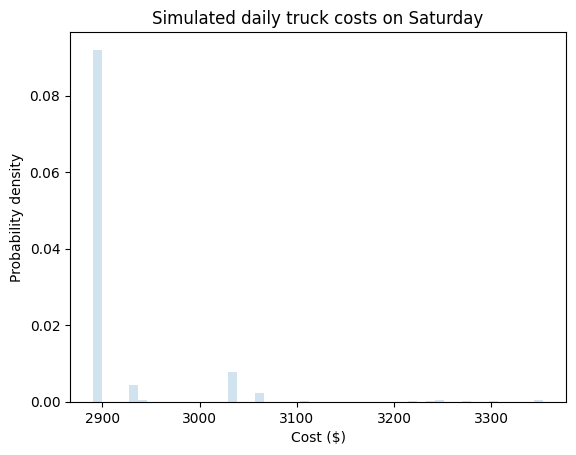

In [30]:
fig, ax = plt.subplots()

plot_pdf(
    ax,
    simulated_saturday.Cost,
    title="Simulated daily truck costs on Saturday",
    xlabel="Cost ($)"
)

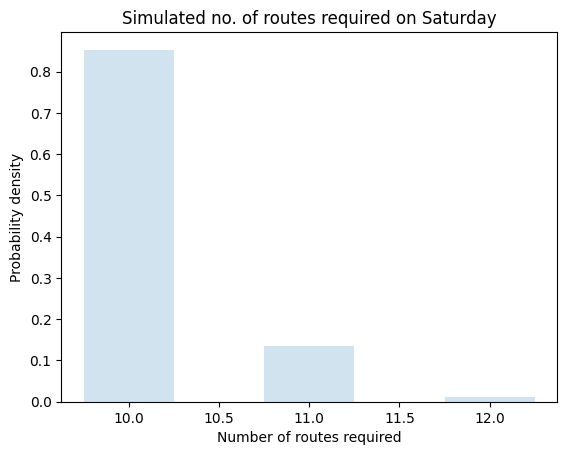

In [31]:
fig, ax = plt.subplots()

plot_pdf(
    ax,
    simulated_saturday.NumRoutes,
    integer=True,
    title="Simulated no. of routes required on Saturday",
    xlabel="Number of routes required"
)

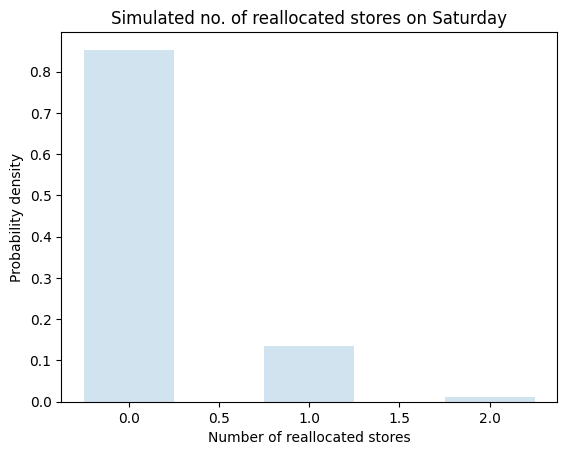

In [32]:
fig, ax = plt.subplots()

plot_pdf(
    ax,
    simulated_saturday.ExtraStores,
    integer=True,
    title="Simulated no. of reallocated stores on Saturday",
    xlabel="Number of reallocated stores"
)

In [33]:
simulated_weekday = simulate_runs(
    selected_weekday, weekday_demands, durations, "Weekdays"
)
simulated_weekday.head()

,Cost,Mainfreight,NumRoutes,ExtraStores
Run,,,,
Run1,4822.554250,0,20,0
Run2,5341.600500,0,22,2
Run3,4822.554250,0,20,0
Run4,5310.150250,0,22,2
Run5,5017.809333,0,21,1


In [34]:
print("Simulation of Weekday Demands")
print("-----------------------------")
print_output_stats(simulated_weekday)

Simulation of Weekday Demands
-----------------------------
Cost: 5186.561000333333, (5145.302066114485, 5227.819934552178)
Mainfreight: 0.021, (0.009797179829879082, 0.032202820170120924)
NumRoutes: 21.532, (21.456240746857993, 21.607759253142007)
ExtraStores: 1.532, (1.4562407468579943, 1.6077592531420057)


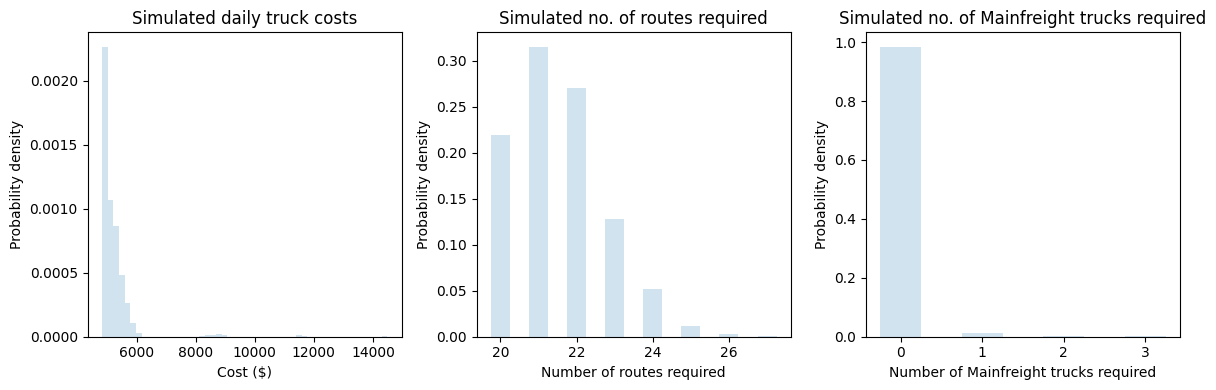

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12,4))

plot_pdf(
    ax1,
    simulated_weekday.Cost,
    title="Simulated daily truck costs",
    xlabel="Cost ($)"
)

plot_pdf(
    ax2,
    simulated_weekday.NumRoutes,
    integer=True,
    title="Simulated no. of routes required",
    xlabel="Number of routes required"
)

plot_pdf(
    ax3,
    simulated_weekday.Mainfreight,
    integer=True,
    title="Simulated no. of Mainfreight trucks required",
    xlabel="Number of Mainfreight trucks required"
)

fig.tight_layout()

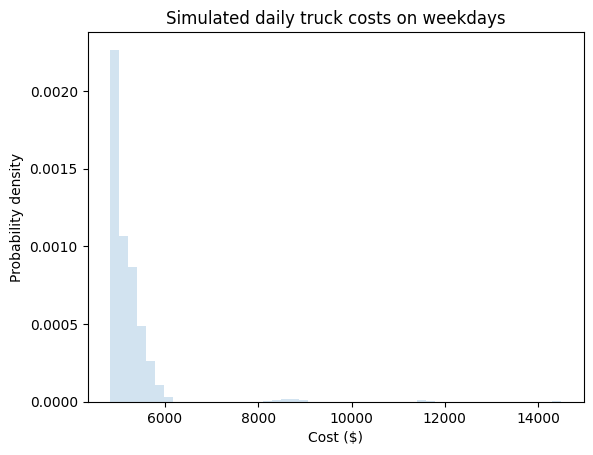

In [36]:
fig, ax = plt.subplots()

plot_pdf(
    ax,
    simulated_weekday.Cost,
    title="Simulated daily truck costs on weekdays",
    xlabel="Cost ($)"
)

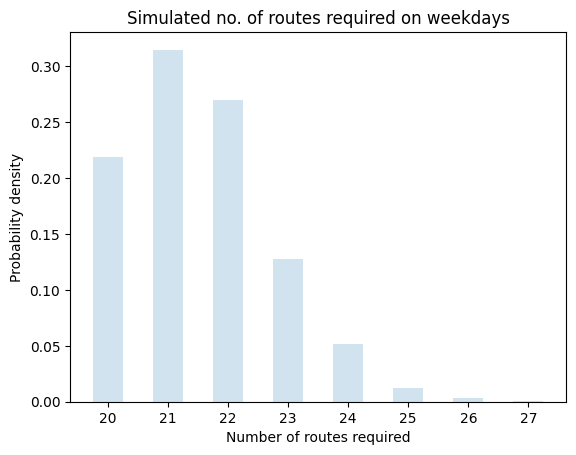

In [37]:
fig, ax = plt.subplots()

plot_pdf(
    ax,
    simulated_weekday.NumRoutes,
    integer=True,
    title="Simulated no. of routes required on weekdays",
    xlabel="Number of routes required"
)

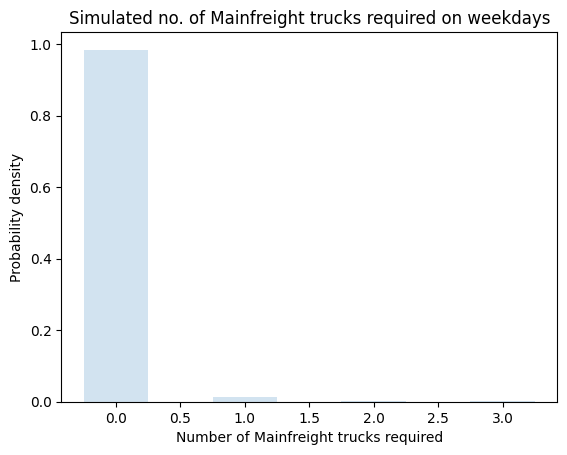

In [38]:
fig, ax = plt.subplots()

plot_pdf(
    ax,
    simulated_weekday.Mainfreight,
    integer=True,
    title="Simulated no. of Mainfreight trucks required on weekdays",
    xlabel="Number of Mainfreight trucks required"
)

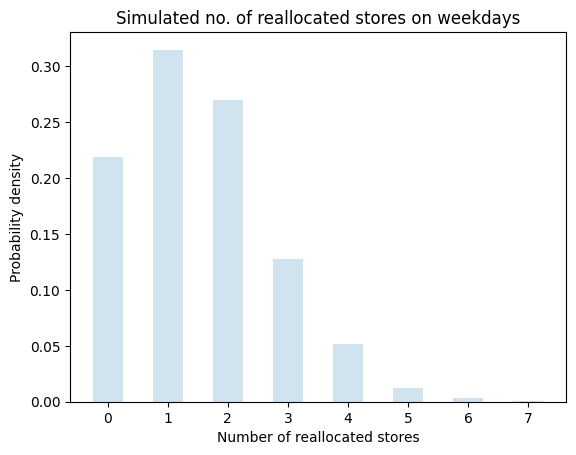

In [39]:
fig, ax = plt.subplots()

plot_pdf(
    ax,
    simulated_weekday.ExtraStores,
    integer=True,
    title="Simulated no. of reallocated stores on weekdays",
    xlabel="Number of reallocated stores"
)